In [1]:
%matplotlib inline

In [2]:
%run -n VehicleDetection.py

The scikit-learn version is 0.18.1.


In [3]:
vehicleDetection = VehicleDetection(train_cars = '../images/vehicles/**/*.png',
                                    train_notcars = '../images/non-vehicles/**/*.png')

Number of car images:  8792
Number of non car images:  8968


In [4]:
vehicleDetection.train()

Using:
Color space =  YCrCb
Spatial size =  (8, 8)
Histogram bins =  32
9 orientations 16 pixels per cell and 2 cells per block
Feature vector length: 1260
74.21 Seconds to build features...
2.69 Seconds to train SVC...
Test Accuracy of SVC =  0.9859


## Histogram of Oriented Gradients (HOG)

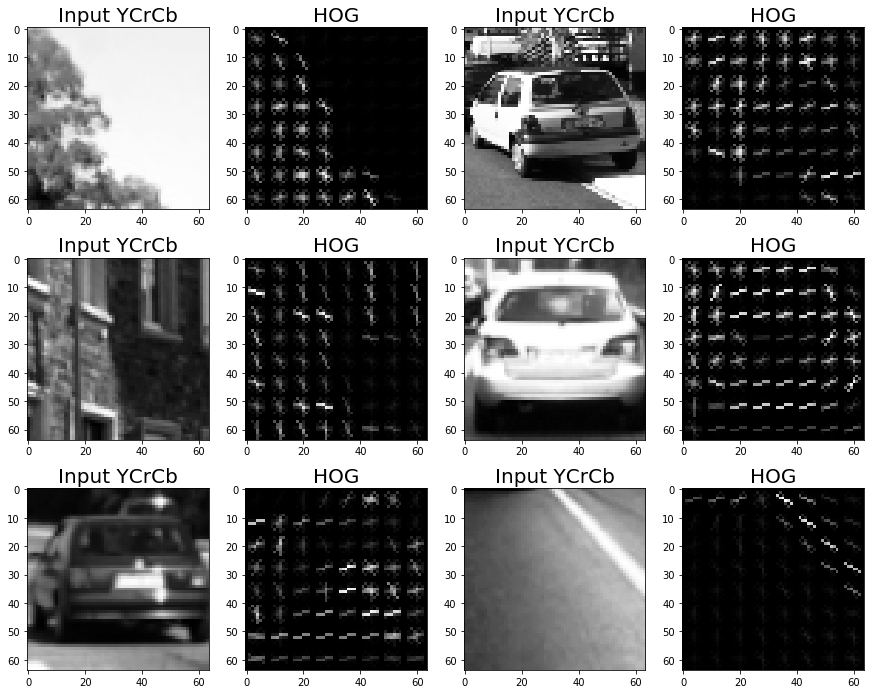

In [5]:
experiment_images = [[cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)] for img in glob.glob('experiments/*.png')]
vehicleDetection.draw_test_images_hog(experiment_images)

## Sliding Window Search

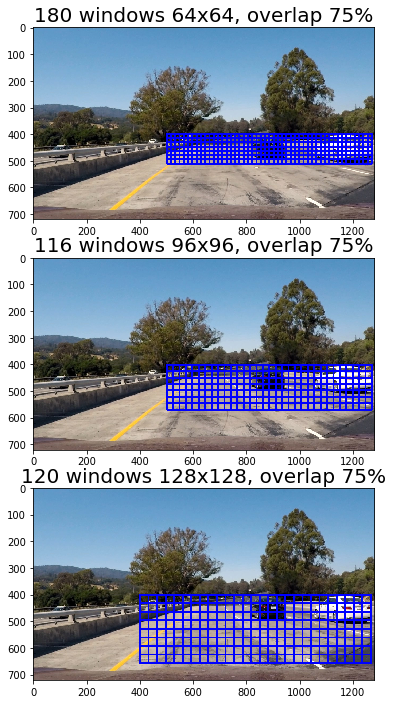

In [6]:
vehicleDetection.draw_sliding_windows()

## Pipeline test

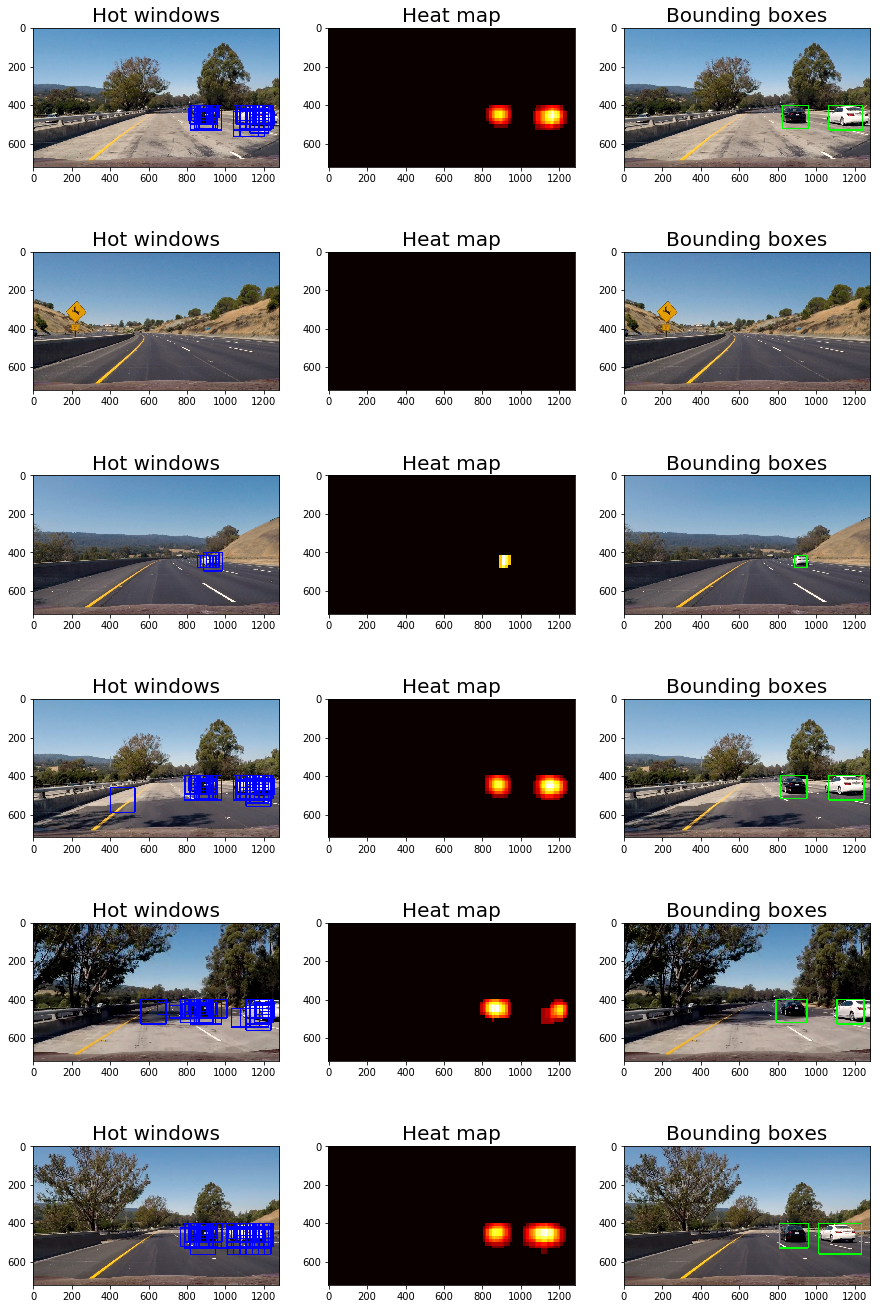

In [7]:
vehicleDetection.draw_detected_cars_multiscale(use_history=False)

## Video Implementation

In [8]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

#clip1 = VideoFileClip('test_video.mp4')
clip1 = VideoFileClip('project_video.mp4')
vehicleDetection.detection_history.queue.clear()
clip = clip1.fl_image(vehicleDetection.pipeline) #NOTE: this function expects color images!!
%time clip.write_videofile('project_video_output.mp4', audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████████████████████████████████▉| 1260/1261 [09:23<00:00,  2.20it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

Wall time: 9min 24s


In [9]:
HTML("""
<video width="640" height="360" controls>
  <source src="{0}">
</video>
""".format('project_video_output.mp4'))